In [22]:
# Start writing code here...
# Start writing code here..
!pip install statsmodels
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
list = ['jp','kr','us']
data = [0]*3
for i in range(len(list)):
    data[i] = pd.read_csv("/work/"+list[i]+".csv")
    data[i] = data[i][data[i].loc[:,'views']<=400000]
    data[i] = data[i][data[i].loc[:,'likes']<=40000]


In [3]:
for i in range(3):
    dummy = data[i].loc[:,"category_id"]
    dummy = pd.get_dummies(dummy,prefix = "id",)
    data[i] = pd.concat([data[i],dummy],axis=1)
    print(data[i].columns)
    data[i] = data[i].rename(columns={'id_10':'id10s','id_15':'id15s','id_17':'id17s'})
    data[i] = data[i].rename(columns={'id_10.0':'id10s','id_15.0':'id15s','id_17.0':'id17s'})

Index(['likes', 'dislikes', 'views', 'comment_count', 'category_id', 'id_10',
       'id_15', 'id_17'],
      dtype='object')
Index(['likes', 'dislikes', 'views', 'comment_count', 'category_id', 'id_10.0',
       'id_15.0', 'id_17.0'],
      dtype='object')
Index(['likes', 'dislikes', 'views', 'comment_count', 'category_id', 'id_10.0',
       'id_15.0', 'id_17.0'],
      dtype='object')


In [12]:
data[1]

,likes,dislikes,views,comment_count,category_id,id10s,id15s,id17s
0,39.19,0.80,927.85,8.98,10.0,1,0,0
1,52.59,2.60,5594.63,7.93,10.0,1,0,0
2,2.28,0.07,336.57,0.20,10.0,1,0,0
3,9.72,0.80,1863.02,2.59,10.0,1,0,0
4,26.44,0.81,3206.34,7.39,10.0,1,0,0
...,...,...,...,...,...,...,...,...
4449,1.94,0.13,466.56,1.28,17.0,0,0,1
4450,5.49,0.25,643.76,2.48,17.0,0,0,1
4451,44.72,2.51,5170.05,25.52,17.0,0,0,1
4452,4.32,0.18,1359.87,1.15,17.0,0,0,1


In [5]:
model = [0]*3
for i in range(3):
    model[i] = ols("likes~views+id10s+I(id15s)+id17s",data = data[i]).fit()
    print(model[i].summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1724.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:35:15   Log-Likelihood:                -35715.
No. Observations:                4450   AIC:                         7.144e+04
Df Residuals:                    4446   BIC:                         7.146e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1467      8.837     -0.469      0.6

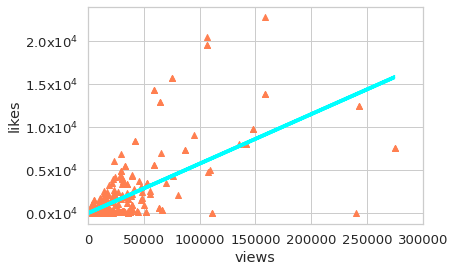

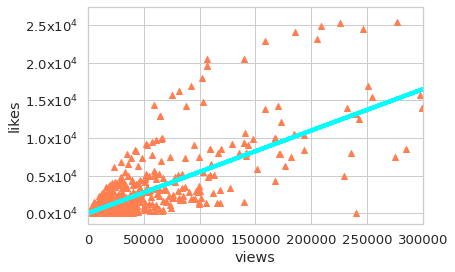

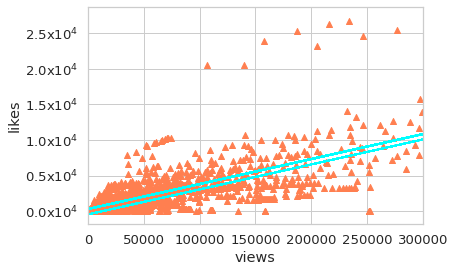

In [28]:
model[1].params
param = [0]*3
for i in range(3):
    param[i] = model[i].params
    f, ax = plt.subplots(1, 1)
    ax.set_xlim([0, 300000])
    def formatnum(x, pos):
        return '$%.1f$x$10^{4}$' % (x/10000)
    formatter = FuncFormatter(formatnum)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel('views')
    ax.set_ylabel('likes')
    x = data[i].loc[:,"views"]
    y = [0]*3
    for j in range(3):
        y[j] = param[i][1]*data[i].loc[:,'views']+param[i][0]+ param[i][j+2]
        plt.plot(x,y[j],color = "aqua")
    plt.scatter(x,data[i].loc[:,'likes'],marker = "^",color = 'coral')
    
    plt.savefig("oneway"+str(i)+".png",dpi = 1000)
    plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = pd.DataFrame()
for i in range(3):
    X = pd.concat([data[i].loc[:,'views'],data[i].iloc[:,-3:-1]],axis = 1)
    y = data[i].iloc[:,0]
    cv_results = cross_val_score(reg,X,y,cv = 5,scoring = 'neg_mean_squared_error')
    print(np.mean(cv_results))

-579238.985067244
-1318330.0068141848
-1936451.8987337952
